<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/DATAMINING_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

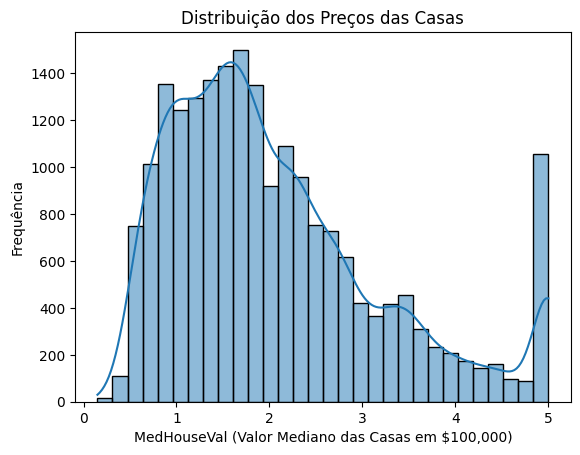

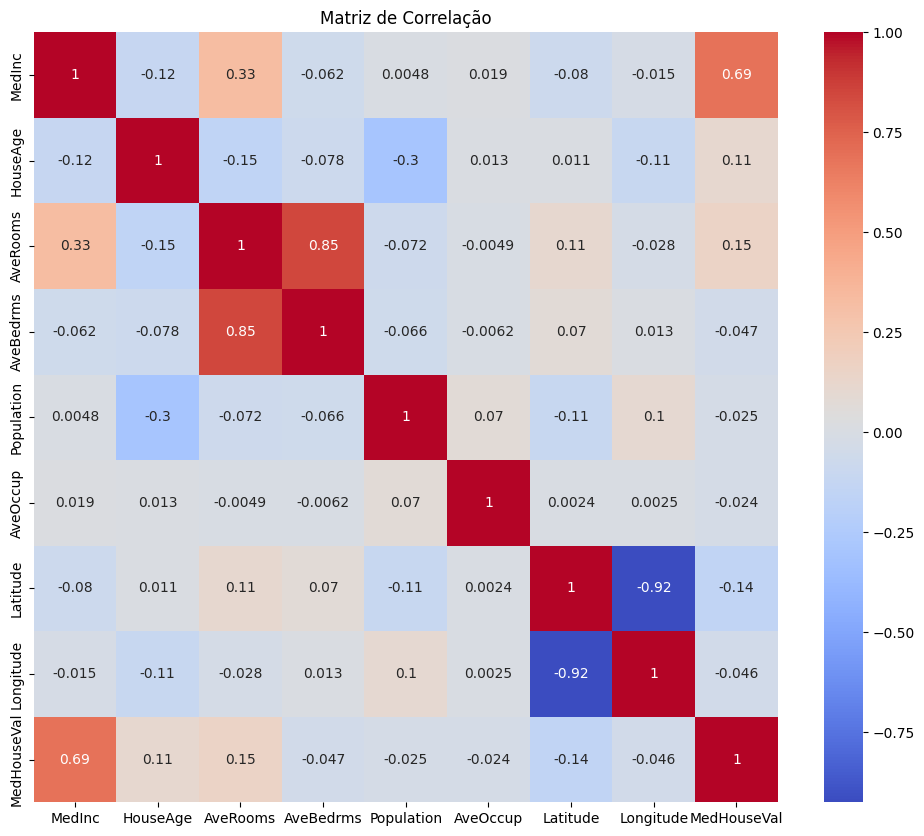

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Importando o conjunto de dados California Housing
california = fetch_california_housing()
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

# Exibindo as primeiras linhas do conjunto de dados
print(df_california.head())

# Informações básicas sobre o conjunto de dados
print(df_california.info())

# Estatísticas descritivas
print(df_california.describe())

# Distribuição dos preços das casas (MedHouseVal)
sns.histplot(df_california['MedHouseVal'], bins=30, kde=True)
plt.title('Distribuição dos Preços das Casas')
plt.xlabel('MedHouseVal (Valor Mediano das Casas em $100,000)')
plt.ylabel('Frequência')
plt.show()

# Heatmap da matriz de correlação
corr_matrix = df_california.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Relação entre variáveis mais correlacionadas e MedHouseVal
sns.pairplot(df_california, vars=['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal'])
plt.show()

# Boxplot para visualizar a distribuição de MedInc por MedHouseVal
plt.figure(figsize=(12, 8))
sns.boxplot(x='MedHouseVal', y='MedInc', data=df_california)
plt.title('Renda Mediana por Valor Mediano das Casas')
plt.xlabel('Valor Mediano das Casas (MedHouseVal)')
plt.ylabel('Renda Mediana (MedInc)')
plt.show()

# Seleção de variáveis independentes (X) e dependente (y)
X = df_california.drop('MedHouseVal', axis=1)
y = df_california['MedHouseVal']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f'Erro Quadrático Médio: {mse}')
print(f'R-quadrado: {r2}')